<a href="https://colab.research.google.com/github/lukandrad/dataScience/blob/master/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Bibliotecas para o grafico
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#Bibliotecas para analise de dados
import pandas as pd

In [0]:
# sphinx_gallery_thumbnail_number = 2

x = ["bk478","bk474","Or342","or346","or348","Org385","Org386","Yw183","Yw189","Yw197","Yw191","Yw195"]
y = ["bk478","bk474","Or342","or346","or348","Org385","Org386","Yw183","Yw189","Yw197","Yw191","Yw195"]
#y = ["Yw195","Yw191","Yw197","Yw189","Yw183","Org386","Org385","or348","or346","Or342","bk474","bk478"]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0, 2.4, 21, 3.9, 0.0, 4.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 4.0],
                    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0, 2.4, 2.5, 3.9, 0.0, 9.0]])




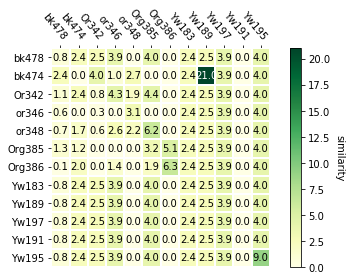

In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-50, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

  
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, x, y, ax=ax,
                   cmap="YlGn", cbarlabel="similarity")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()